In [1]:
import pandas as pd

In [2]:
import numpy as np


In [52]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
data = pd.read_csv('data/fiuba-trocafone-tp1-final-set/events.csv')

/home/july/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [6]:
data.event.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [41]:
modeldf = data[['model']].dropna()

In [42]:
modeldf.head()

,model
2,iPhone 5s
3,iPhone 5s
4,Samsung Galaxy S8
7,Samsung Galaxy S8
13,Motorola Moto Z Play


In [47]:
modelSerie = modeldf['model'].str.split(" ")

In [48]:
modelSerie.head()

2                  [iPhone, 5s]
3                  [iPhone, 5s]
4         [Samsung, Galaxy, S8]
7         [Samsung, Galaxy, S8]
13    [Motorola, Moto, Z, Play]
dtype: object

In [49]:
text = " ".join(model[0] for model in modelSerie)

¿Cual es el modelo mas popular?

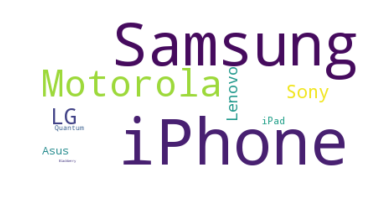

In [54]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,collocations=False, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
wordcloud.to_file("data/wc_cell.png")

In [69]:
cell_mask = np.array(Image.open("data/cell-phone.png"))

In [70]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [72]:
 #Transform your mask into a new one that will work with the function:
transformed_cell_mask = np.ndarray((cell_mask.shape[0],cell_mask.shape[1]), np.int32)

for i in range(len(cell_mask)):
    transformed_cell_mask[i] = list(map(transform_format, cell_mask[i]))

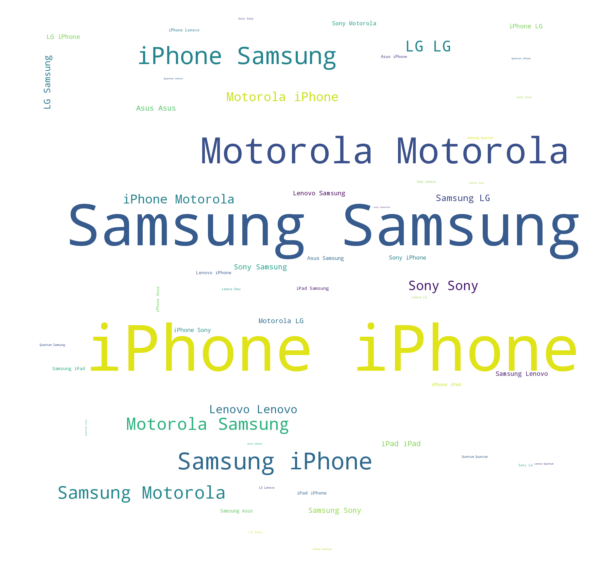

In [75]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=cell_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("data/wc_cell.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [80]:
data.country.value_counts().head(4)

Brazil           84308
Unknown           2313
United States      465
Argentina           94
Name: country, dtype: int64

In [100]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [7]:
data[data['person']=='0004b0a2'][['event','timestamp','country','skus']]

,event,timestamp,country,skus
0,ad campaign hit,2018-05-31 23:38:05,NaN,NaN
1,visited site,2018-05-31 23:38:05,Brazil,NaN
2,viewed product,2018-05-31 23:38:09,NaN,NaN
3,checkout,2018-05-31 23:38:40,NaN,NaN


In [162]:
otros = data[(data['country']!= 'Brazil') & (data['country']!= 'Unknown')]

In [182]:
algo =data.groupby('person').apply(lambda x: x[['country']].count())

In [186]:
data.shape

(1011288, 23)

In [188]:
len(data['person'].unique())

27624

In [184]:
algo.shape

(27624, 1)

In [185]:
algo[algo['country']==1].shape

(15769, 1)

In [179]:
data.count()

timestamp                   1011288
event                       1011288
person                      1011288
url                           82756
sku                          563838
model                        564284
condition                    563836
storage                      563836
color                        563836
skus                         221699
search_term                   48967
staticpage                     3598
campaign_source               82796
search_engine                 50957
channel                       87378
new_vs_returning              87378
city                          87378
region                        87378
country                       87378
device_type                   87378
screen_resolution             87378
operating_system_version      87378
browser_version               87378
dtype: int64

In [174]:
algo[algo['country']>1]

,country
person,
06c161b0,2
0773c303,3
089958e4,2
09fb995a,2
0d8dd5c0,2
1560f2f8,2
16433984,17
1919c898,6
1ac30d96,2


In [142]:
data.head(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0


In [110]:
data['event'] = data['event'].apply(lambda x: str(x).replace(" ", "_"))

In [130]:
data.country.value_counts().head(4)

Brazil           84308
Unknown           2313
United States      465
Argentina           94
Name: country, dtype: int64

In [135]:
data[data['event']=='checkout'].head(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
data[data['event']=='checkout'].country.value_counts()

Series([], Name: country, dtype: int64)

In [114]:
# Join all reviews of each country:
Braziltxt = " ".join(event for event in data[data['country']== "Brazil"].event)
UStxt = " ".join(model for model in data[data['country']== "United States"].event)
Argentinatxt = " ".join(model for model in data[data['country']== "Argentina"].event)

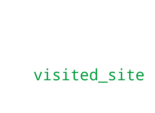

In [118]:
# Generate a word cloud image
mask = np.array(Image.open("img/br.png"))
wordcloud_br = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=10000, mask=mask).generate(Braziltxt)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[2,2])
plt.imshow(wordcloud_br.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/bra_cell.png", format="png")

#plt.show()